In [61]:
import numpy as np
from tensorflow import keras

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

X = iris.data
y = iris.target

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=0)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [53]:
train_data

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import TensorBoard
import datetime

# Building Keras Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

# Compile Keras Model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

log_dir = "logs/fit/Iris_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [37]:
model.fit(
  train_data, # training data
  train_labels, # training targets
  epochs=15,
  batch_size=32,
  validation_data=(test_data, test_labels),
  callbacks=[tensorboard_callback]
)

model.save_weights('./models/Iris_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '_model.h5')

Train on 105 samples, validate on 45 samples
Epoch 1/15
105/105 [==============================] - 0s 3ms/sample - loss: 1.2276 - accuracy: 0.1524 - val_loss: 1.1262 - val_accuracy: 0.2444
Epoch 2/15
105/105 [==============================] - 0s 215us/sample - loss: 1.0110 - accuracy: 0.3619 - val_loss: 1.0874 - val_accuracy: 0.2444
Epoch 3/15
105/105 [==============================] - 0s 203us/sample - loss: 0.9486 - accuracy: 0.3714 - val_loss: 1.0295 - val_accuracy: 0.2444
Epoch 4/15
105/105 [==============================] - 0s 220us/sample - loss: 0.8958 - accuracy: 0.3714 - val_loss: 0.9540 - val_accuracy: 0.2444
Epoch 5/15
105/105 [==============================] - 0s 214us/sample - loss: 0.8537 - accuracy: 0.3810 - val_loss: 0.8893 - val_accuracy: 0.3111
Epoch 6/15
105/105 [==============================] - 0s 185us/sample - loss: 0.8154 - accuracy: 0.5238 - val_loss: 0.8321 - val_accuracy: 0.4889
Epoch 7/15
105/105 [==============================] - 0s 220us/sample - loss: 0.7

In [62]:
from collections import Counter
model.load_weights('./models/Iris_20200405-140129_model.h5')

predictions = model.predict(X)
print(predictions)

pred_array = np.argmax(predictions, axis=1)
actual_array = y

# # Print our model's predictions.
print(pred_array) # [7, 2, 1, 0, 4]

# # Check our predictions against the ground truths.
print(actual_array) # [7, 2, 1, 0, 4]

comparisons = Counter([a == actual_array[index] for index, a in enumerate(pred_array)])
comparisons

[[0.75 0.21 0.03]
 [0.7  0.25 0.05]
 [0.73 0.23 0.04]
 [0.68 0.26 0.05]
 [0.76 0.21 0.03]
 [0.75 0.22 0.04]
 [0.72 0.23 0.05]
 [0.73 0.23 0.04]
 [0.67 0.27 0.06]
 [0.7  0.26 0.04]
 [0.77 0.21 0.03]
 [0.71 0.25 0.04]
 [0.7  0.25 0.04]
 [0.72 0.23 0.05]
 [0.81 0.17 0.02]
 [0.81 0.17 0.02]
 [0.79 0.18 0.03]
 [0.75 0.21 0.04]
 [0.76 0.21 0.03]
 [0.76 0.21 0.03]
 [0.71 0.25 0.04]
 [0.75 0.21 0.04]
 [0.77 0.19 0.03]
 [0.68 0.27 0.06]
 [0.65 0.29 0.06]
 [0.67 0.28 0.05]
 [0.7  0.25 0.05]
 [0.74 0.22 0.03]
 [0.75 0.22 0.03]
 [0.68 0.27 0.05]
 [0.68 0.27 0.05]
 [0.73 0.23 0.04]
 [0.79 0.19 0.02]
 [0.81 0.17 0.02]
 [0.7  0.26 0.05]
 [0.75 0.22 0.04]
 [0.77 0.2  0.03]
 [0.76 0.21 0.03]
 [0.7  0.25 0.05]
 [0.73 0.23 0.04]
 [0.76 0.21 0.04]
 [0.62 0.31 0.08]
 [0.72 0.24 0.05]
 [0.7  0.24 0.06]
 [0.7  0.25 0.05]
 [0.69 0.26 0.05]
 [0.75 0.21 0.03]
 [0.71 0.24 0.05]
 [0.76 0.21 0.03]
 [0.73 0.23 0.04]
 [0.16 0.54 0.3 ]
 [0.16 0.5  0.34]
 [0.13 0.52 0.36]
 [0.14 0.46 0.41]
 [0.13 0.49 0.39]
 [0.13 0.4

Counter({True: 144, False: 6})

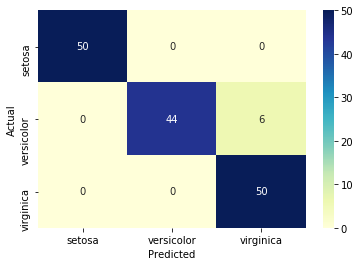

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

array = confusion_matrix(actual_array, pred_array)

df_cm = pd.DataFrame(array, index = [i for i in iris.target_names],
                  columns = [i for i in iris.target_names])

fig = sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [57]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')